# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=b6e3aed1bddb6bb142ff8b4087fadffd"
url     

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=b6e3aed1bddb6bb142ff8b4087fadffd'

In [16]:
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

for city in cities:
    weather_response = requests.get(url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        print(f'Processing record{cities.index(city)} | {city}')
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        
    except:
        print("Record not found") 
        continue

Processing record0 | longyearbyen
Processing record1 | sioux lookout
Processing record2 | sapouy
Processing record3 | buchanan
Processing record4 | edd
Processing record5 | oriximina
Processing record6 | seymchan
Processing record7 | ribeira grande
Processing record8 | new norfolk
Processing record9 | mataura
Processing record10 | khash
Processing record11 | laives
Processing record12 | xichang
Processing record13 | atuona
Processing record14 | rikitea
Processing record15 | saint-joseph
Processing record16 | cayenne
Processing record17 | lagoa
Processing record18 | bluff
Processing record19 | santa isabel
Processing record20 | bathsheba
Processing record21 | bukachacha
Processing record22 | saint george
Processing record23 | punta arenas
Processing record24 | tillabery
Record not found
Processing record25 | kavaratti
Processing record26 | jamestown
Processing record27 | bafra
Processing record28 | sitka
Processing record29 | tasiilaq
Processing record30 | port alfred
Processing record3

Processing record248 | dingle
Processing record249 | hoquiam
Processing record250 | port moresby
Processing record251 | puerto escondido
Processing record252 | umm kaddadah
Processing record253 | clyde river
Processing record254 | san lawrenz
Processing record255 | vestbygda
Record not found
Processing record256 | bambous virieux
Processing record257 | leningradskiy
Processing record258 | qaanaaq
Processing record259 | nemuro
Processing record260 | harper
Processing record261 | anito
Processing record262 | tandalti
Processing record263 | cartagena
Processing record264 | ye
Record not found
Processing record265 | guerrero negro
Processing record266 | barao de melgaco
Processing record267 | marcona
Record not found
Processing record268 | turukhansk
Processing record269 | oranjemund
Processing record270 | bambanglipuro
Processing record271 | rehoboth
Processing record272 | santa isabel do rio negro
Processing record273 | poum
Processing record274 | tiarei
Processing record275 | wellsford


Processing record490 | metro
Processing record491 | dalvik
Processing record492 | semporna
Processing record493 | barcelos
Processing record494 | verkhnyaya inta
Processing record495 | micheweni
Processing record496 | corning
Processing record497 | gberia fotombu
Processing record498 | kudahuvadhoo
Processing record499 | kushima
Processing record500 | svetlyy
Processing record501 | san felipe
Processing record502 | huambo
Processing record503 | roura
Processing record504 | santa rosa
Processing record505 | vaitupu
Record not found
Processing record506 | clearwater
Processing record507 | samalaeulu
Record not found
Processing record508 | darhan
Processing record509 | datong
Processing record510 | rocha
Processing record511 | kirakira
Processing record512 | noumea
Processing record513 | walvis bay
Processing record514 | sinnamary
Processing record515 | alyangula
Processing record516 | diamantino
Processing record517 | suez
Processing record518 | kupang
Processing record519 | vila velha
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.2186,15.6401,-0.09,92,100,2.91,SJ,1584673200
1,Sioux Lookout,50.1001,-91.9170,16.43,92,100,13.06,CA,1584673200
2,Sapouy,11.5544,-1.7736,85.91,45,100,3.62,BF,1584673200
3,Buchanan,5.8808,-10.0467,77.45,89,70,3.18,LR,1584673200
4,Edd,13.9297,41.6925,75.83,87,100,10.47,ER,1584673200


In [18]:
weather_data.to_csv(r'output_data\my_weather_1.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

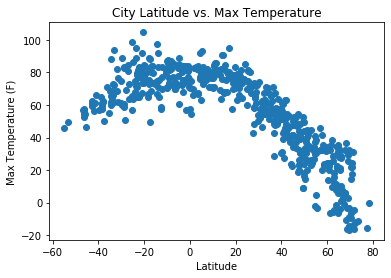

In [19]:
scatlat = weather_data["Latitude"]
scattemp = weather_data["Max Temp"]

plt.scatter(scatlat,scattemp)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatplotlatitudemaxtemp')
plt.show()

#### Latitude vs. Humidity Plot

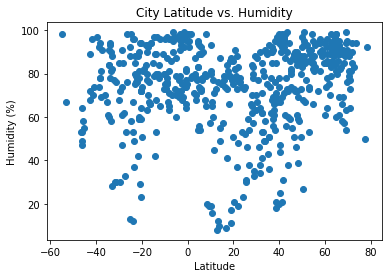

In [20]:
scathum = weather_data["Humidity"]

plt.scatter(scatlat,scathum)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatplotlatitudehumidity')
plt.show()

#### Latitude vs. Cloudiness Plot

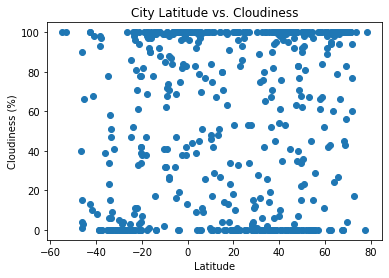

In [21]:
scatcloud = weather_data["Cloudiness"]

plt.scatter(scatlat,scatcloud)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatplotlatitudecloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

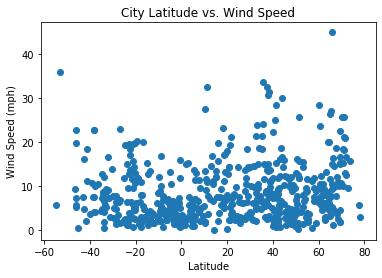

In [22]:
scatwindsp = weather_data["Wind Speed"]

plt.scatter(scatlat,scatwindsp)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatplotlatitudewindspeed')
plt.show()

## Linear Regression

In [23]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.2186,15.6401,-0.09,92,100,2.91,SJ,1584673200
1,Sioux Lookout,50.1001,-91.9170,16.43,92,100,13.06,CA,1584673200
2,Sapouy,11.5544,-1.7736,85.91,45,100,3.62,BF,1584673200
3,Buchanan,5.8808,-10.0467,77.45,89,70,3.18,LR,1584673200
4,Edd,13.9297,41.6925,75.83,87,100,10.47,ER,1584673200


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8948327124347965


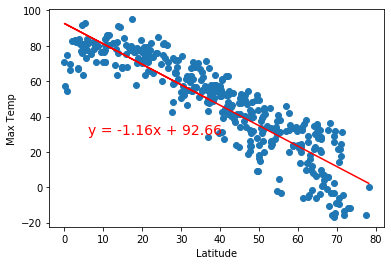

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('northerntemplat')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5531757964771036


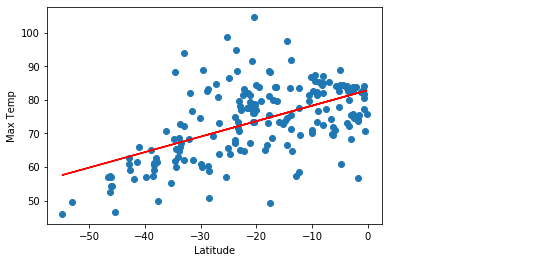

The high r value indicates a strong positive correlation between latitude and max temperature.


<Figure size 432x288 with 0 Axes>

In [26]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('southerntemplat')

print("The high r value indicates a strong positive correlation between latitude and max temperature.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.28563150243186597


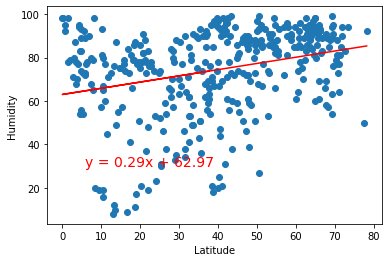

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northernhumlat')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24671191636289996


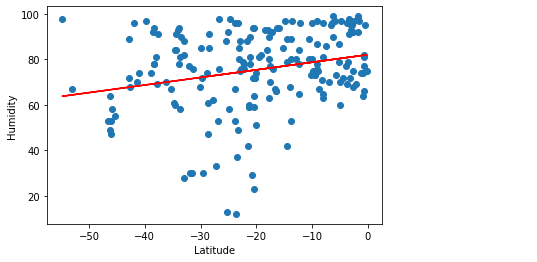

<Figure size 432x288 with 0 Axes>

In [28]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('southernhumlat')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15426711846145147


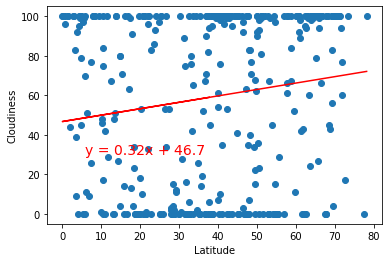

<Figure size 432x288 with 0 Axes>

In [29]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('northerncloudlat')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3992318154902329


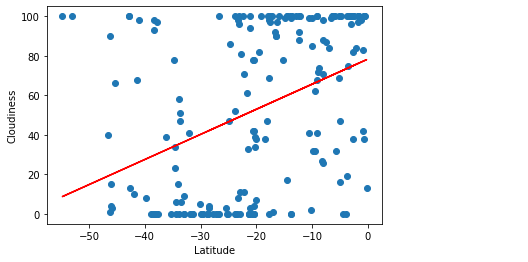

<Figure size 432x288 with 0 Axes>

In [30]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('southerncloudlat')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1374459894577864


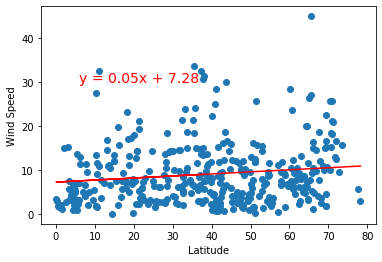

<Figure size 432x288 with 0 Axes>

In [31]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('northernwindlat')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.32861919998651234


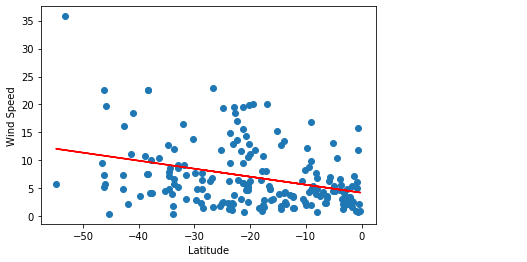

<Figure size 432x288 with 0 Axes>

In [32]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('southernwindlat')